In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
#Import Handwritten digits dataset from keras library
(x_train,y_train) ,(x_test,y_test)= keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

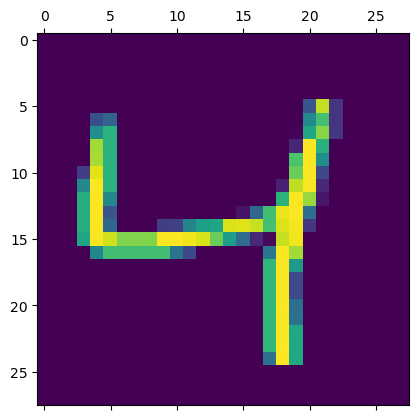

In [8]:
plt.matshow(x_train[2])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
#Scaling
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
#Convert 2-D into 1-D 
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [15]:
#Returns : No of images,Dimension
x_test_flattened.shape

(10000, 784)

In [16]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
#one layer connected to every other layer  
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
#optimizer allows to reach global optima in efficient way
#output class are categorical 
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 311us/step - loss: 0.4726 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 1s 304us/step - loss: 0.3049 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 304us/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 303us/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 304us/step - loss: 0.2668 - accuracy: 0.9261


In [18]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 285us/step - loss: 0.2678 - accuracy: 0.9256


[0.2678084969520569, 0.925599992275238]

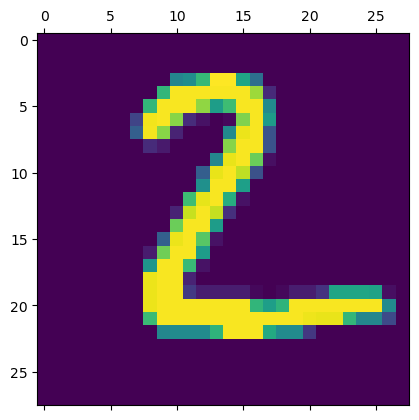

In [19]:
plt.matshow(x_test[1])

In [20]:
#Printing 10 scores for number 0 to 9
y_predicted=model.predict(x_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 236us/step


array([2.55454272e-01, 5.17522078e-03, 9.99265671e-01, 2.33974308e-01,
       7.43876571e-10, 8.53462517e-01, 9.25037861e-01, 8.17207142e-13,
       1.22924075e-01, 2.67451905e-09], dtype=float32)

In [21]:
#Looking at maximum score
np.argmax(y_predicted[1])

2

In [22]:
#Convert into concrete labels
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 948,    0,    2,    1,    0,   10,   11,    5,    2,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,   11,  926,   13,    8,    6,   13,   10,   37,    5],
       [   1,    0,   17,  918,    0,   34,    3,   11,   15,   11],
       [   1,    2,    5,    1,  901,    0,   11,    5,    9,   47],
       [   7,    3,    2,   21,    7,  799,   18,    5,   23,    7],
       [   6,    3,    4,    1,    7,   15,  918,    2,    2,    0],
       [   1,    7,   22,    7,    2,    0,    0,  951,    1,   37],
       [   3,   11,    7,   24,    9,   37,    9,   11,  851,   12],
       [   7,    7,    2,   10,   19,   10,    0,   20,    6,  928]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

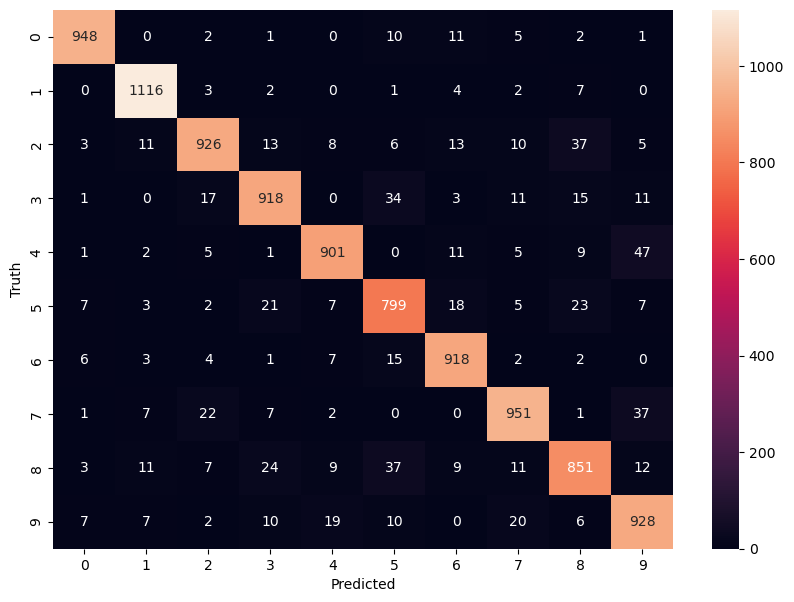

In [25]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
#Add a Hidden Layer 
model=keras.Sequential([
    #specify no. of neurons you wnat in hidden layer
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid')
])
#optimizer allows to reach global optima in efficient way
#output class are categorical 
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 504us/step - loss: 0.2727 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 1s 496us/step - loss: 0.1228 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 1s 508us/step - loss: 0.0866 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 1s 497us/step - loss: 0.0653 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 1s 495us/step - loss: 0.0506 - accuracy: 0.9847


In [27]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 346us/step - loss: 0.0807 - accuracy: 0.9758


[0.08068644255399704, 0.9757999777793884]

Text(95.72222222222221, 0.5, 'Truth')

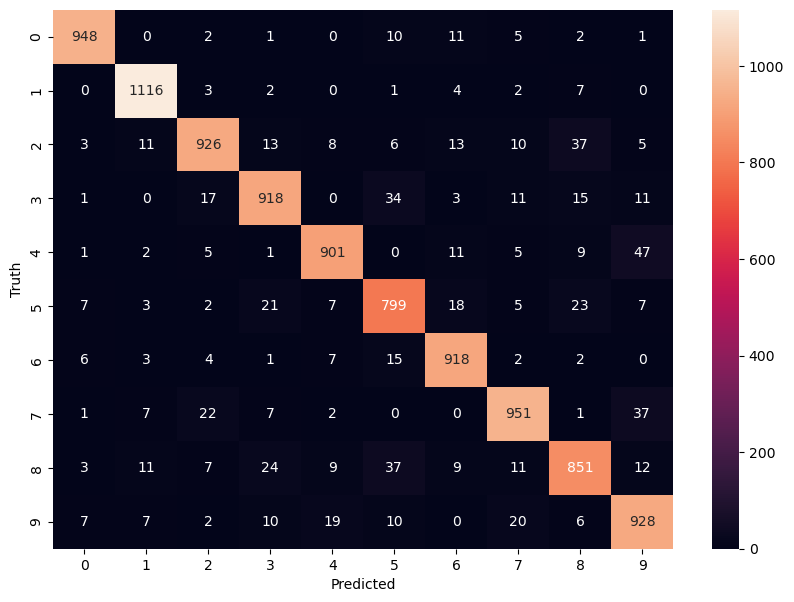

In [28]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid')
])
#Tensorboard callback
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)
#optimizer allows to reach global optima in efficient way
#output class are categorical 
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

model.fit(x_train,y_train,epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 1s 563us/step - loss: 0.2712 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 1s 543us/step - loss: 0.1232 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 1s 544us/step - loss: 0.0876 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 1s 540us/step - loss: 0.0663 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 1s 544us/step - loss: 0.0524 - accuracy: 0.9841


In [30]:
#play with hidden layers, activation fn, Losses

In [31]:
#Launching Tensorboard
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [34]:
x_test.shape

(10000, 28, 28)

### Model Building and Training using CNN

In [39]:
from tensorflow import keras
from tensorflow.keras import layers 

cnn = keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [40]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [42]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1435 - accuracy: 0.9562
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0472 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0327 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0243 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0099 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0088 - accuracy: 0.9970
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [44]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9900


[0.03641023486852646, 0.9900000095367432]

In [46]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y[index]])

In [49]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.0942327e-14, 9.8799679e-13, 1.5339660e-11, 3.0405043e-13,
        3.1652101e-12, 6.1029948e-17, 3.7448924e-22, 1.0000000e+00,
        3.2231164e-12, 2.4029605e-11],
       [2.2954839e-12, 4.1853990e-12, 1.0000000e+00, 1.0151883e-18,
        1.9794101e-14, 3.3695920e-20, 9.4766762e-13, 3.9726624e-15,
        1.0108942e-12, 7.3830154e-18],
       [9.3410869e-11, 9.9999976e-01, 6.9217913e-12, 1.5406030e-16,
        2.0433295e-07, 1.3828626e-11, 4.8373514e-09, 8.9021066e-09,
        4.9973303e-11, 1.5374506e-12],
       [1.0000000e+00, 6.1654528e-16, 4.0545214e-17, 3.8614055e-17,
        8.4948165e-18, 7.6869171e-12, 1.7918214e-08, 5.6514290e-12,
        2.1376887e-12, 4.0726638e-14],
       [1.1244686e-13, 2.9594288e-13, 3.4876561e-14, 3.3855849e-18,
        1.0000000e+00, 6.3016877e-13, 1.4274457e-11, 5.0412948e-14,
        3.6592138e-16, 2.7040128e-09]], dtype=float32)

In [50]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)